# Multiple Linear Regression for Robot Calibration

In this lab, we will illustrate the use of multiple linear regression for calibrating robot control.  In addition to reviewing the concepts in multiple linear regression , you will see how to use multiple linear regression for time series data -- an important concept in dynamical systems such as robotics.

The data is from a three link robot:

<img src="https://rst.etit.tu-dortmund.de/storages/rst-etit/r/Media_Forschung/Robotik/Leichtbau/TUDORBild.png" height="200" width="200">


We will focus on predicting the current draw into one of the joints as a function of the robot motion.  Such models are essential in predicting the overall robot power consumption.  Several other models could also be used.

## Load and Visualize the Data
First, import the modules we will need.

In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The full MERIt dataset can be obtained from the [MERIt site](https://rst.etit.tu-dortmund.de/en/forschung/robotik/leichtbau/details-tudor/#c11560).  But, this dataset is large.  We include only two of the ten experiments.  Each experiments corresonds to 80 seconds of recorded motion.  We will use the following files:
* [exp1.csv](./exp1.csv) for training
* [exp2.csv](./exp2.csv) for test

If you are running this notebook on Google colab, you will need to run the following commands to load the files onto your local machine.  Otherwise, you can skip this step.

In [ ]:
import os
from six.moves import urllib

for fn_dst in ['exp1.csv', 'exp2.csv']:
    fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/%s' % fn_dst

    if os.path.isfile(fn_dst):
        print('File %s is already downloaded' % fn_dst)
    else:
        print('Downloaded %s' % fn_dst)
        urllib.request.urlretrieve(fn_src, fn_dst)

Below, I have supplied the column headers in the `names` array.  Use the `pd.read_csv` command to load the training data in `exp1.csv`.  Use the `names` option to specify column names of the dataframe 

In [71]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]
# TODO 
df = pd.read_csv("exp1.csv", header=None, names=names) 

Print the first six lines of the pandas dataframe and manually check that they match the first rows of the csv file.

In [72]:
# TODO
print(df.head(6))

      t        q1      q2      q3           dq1            dq2           dq3  \
0  0.00 -0.000007  2.4958 -1.1345 -7.882100e-21 -4.940656e-321  3.913100e-29   
1  0.01 -0.000007  2.4958 -1.1345 -2.258200e-21 -4.940656e-321  2.626200e-31   
2  0.02 -0.000007  2.4958 -1.1345 -6.469800e-22 -4.940656e-321  1.762500e-33   
3  0.03 -0.000007  2.4958 -1.1345 -1.853600e-22 -4.940656e-321  1.182800e-35   
4  0.04 -0.000007  2.4958 -1.1345 -5.310600e-23 -4.940656e-321 -5.270900e-03   
5  0.05 -0.000007  2.4958 -1.1345 -1.521500e-23 -4.940656e-321  3.252600e-04   

         I1       I2       I3   eps21   eps22   eps31    eps32          ddq1  \
0 -0.081623 -0.40812 -0.30609 -269.25 -113.20  3.5918  1.57860 -9.904900e-19   
1 -0.037411 -0.37241 -0.26698 -270.91 -116.05  1.4585 -1.73980  4.248100e-19   
2 -0.066319 -0.40302 -0.31459 -269.25 -112.97  3.5918  0.86753  3.233800e-19   
3 -0.068020 -0.43703 -0.28398 -269.97 -114.39  1.6956 -0.08059  1.500500e-19   
4 -0.052715 -0.40472 -0.30779 -269.97 -

From the dataframe `df`, extract the time indices into a vector `t` and extract `I2`, the current into the second joint.  Place the current in a vector `y` and plot `y` vs. `t`.   Label the axes with the units.

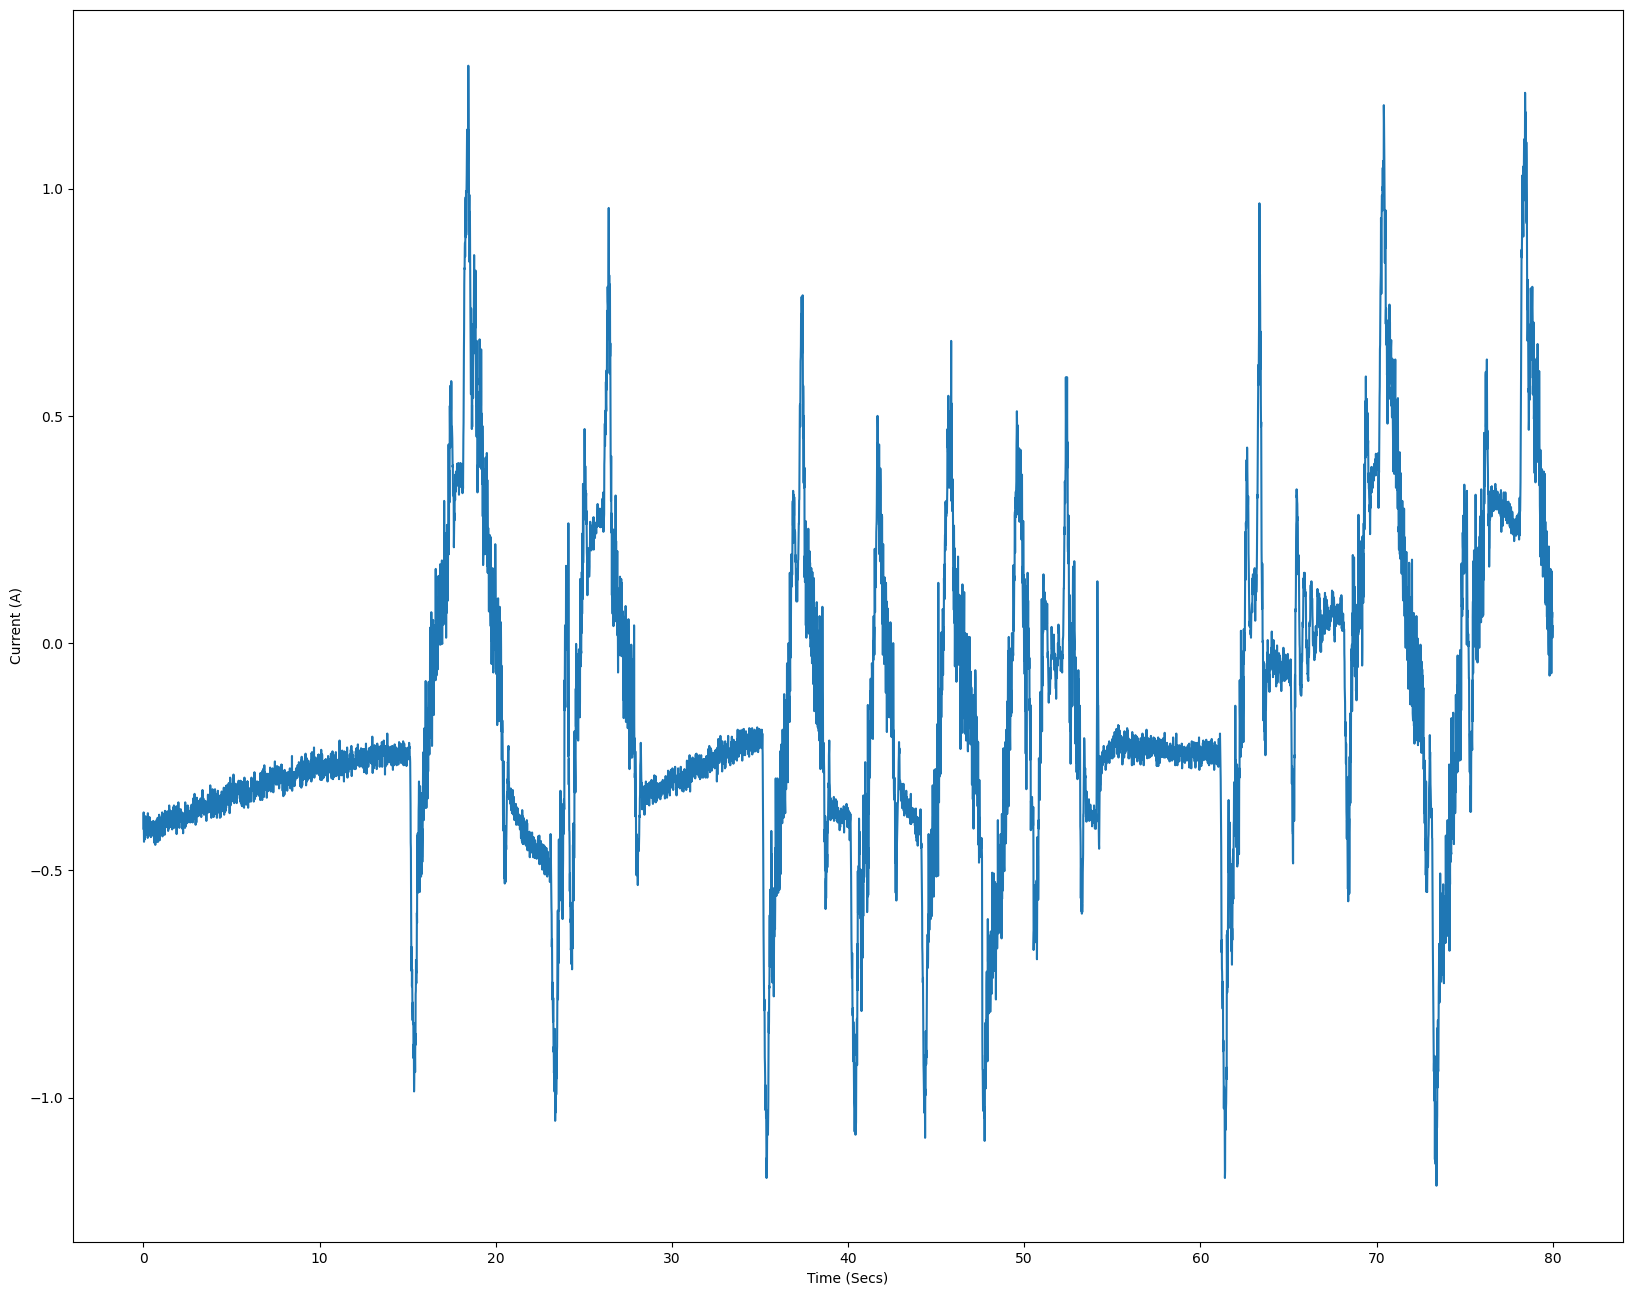

In [73]:
# TODO
y = df[names[8]]
t = df[names[0]]
plt.figure(figsize=(20,16))
plt.plot(t,y)
plt.xlabel('Time (Secs)')
plt.ylabel('Current (A)')
plt.show()

Use all the samples from the experiment 1 dataset to create the training data:
* `ytrain`:  A vector of all the samples from the `I2` column
* `Xtrain`:  A matrix of the data with the columns:  `['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']`

In [74]:
# TODO
ytrain = df[names[8]]
Xtrain =df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
print(ytrain)

0      -0.408120
1      -0.372410
2      -0.403020
3      -0.437030
4      -0.404720
          ...   
7995    0.086725
7996    0.056116
7997    0.068020
7998    0.011903
7999    0.037411
Name: I2, Length: 8000, dtype: float64


## Fit a Linear Model
Use the `sklearn.linear_model` module to create a `LinearRegression` object `regr`.

In [75]:
from sklearn import linear_model

# Create linear regression object
# TODO
regr = linear_model.LinearRegression()

Train the model on the training data.

In [76]:
# TODO
regr.fit(Xtrain,ytrain)

LinearRegression()

Using the trained model, compute, `ytrain_pred`, the predicted current.  Plot `ytrain_pred` vs. time `t`.  On the same plot, plot the actual current `ytrain` vs. time `t`.  Create a legend for the plot.

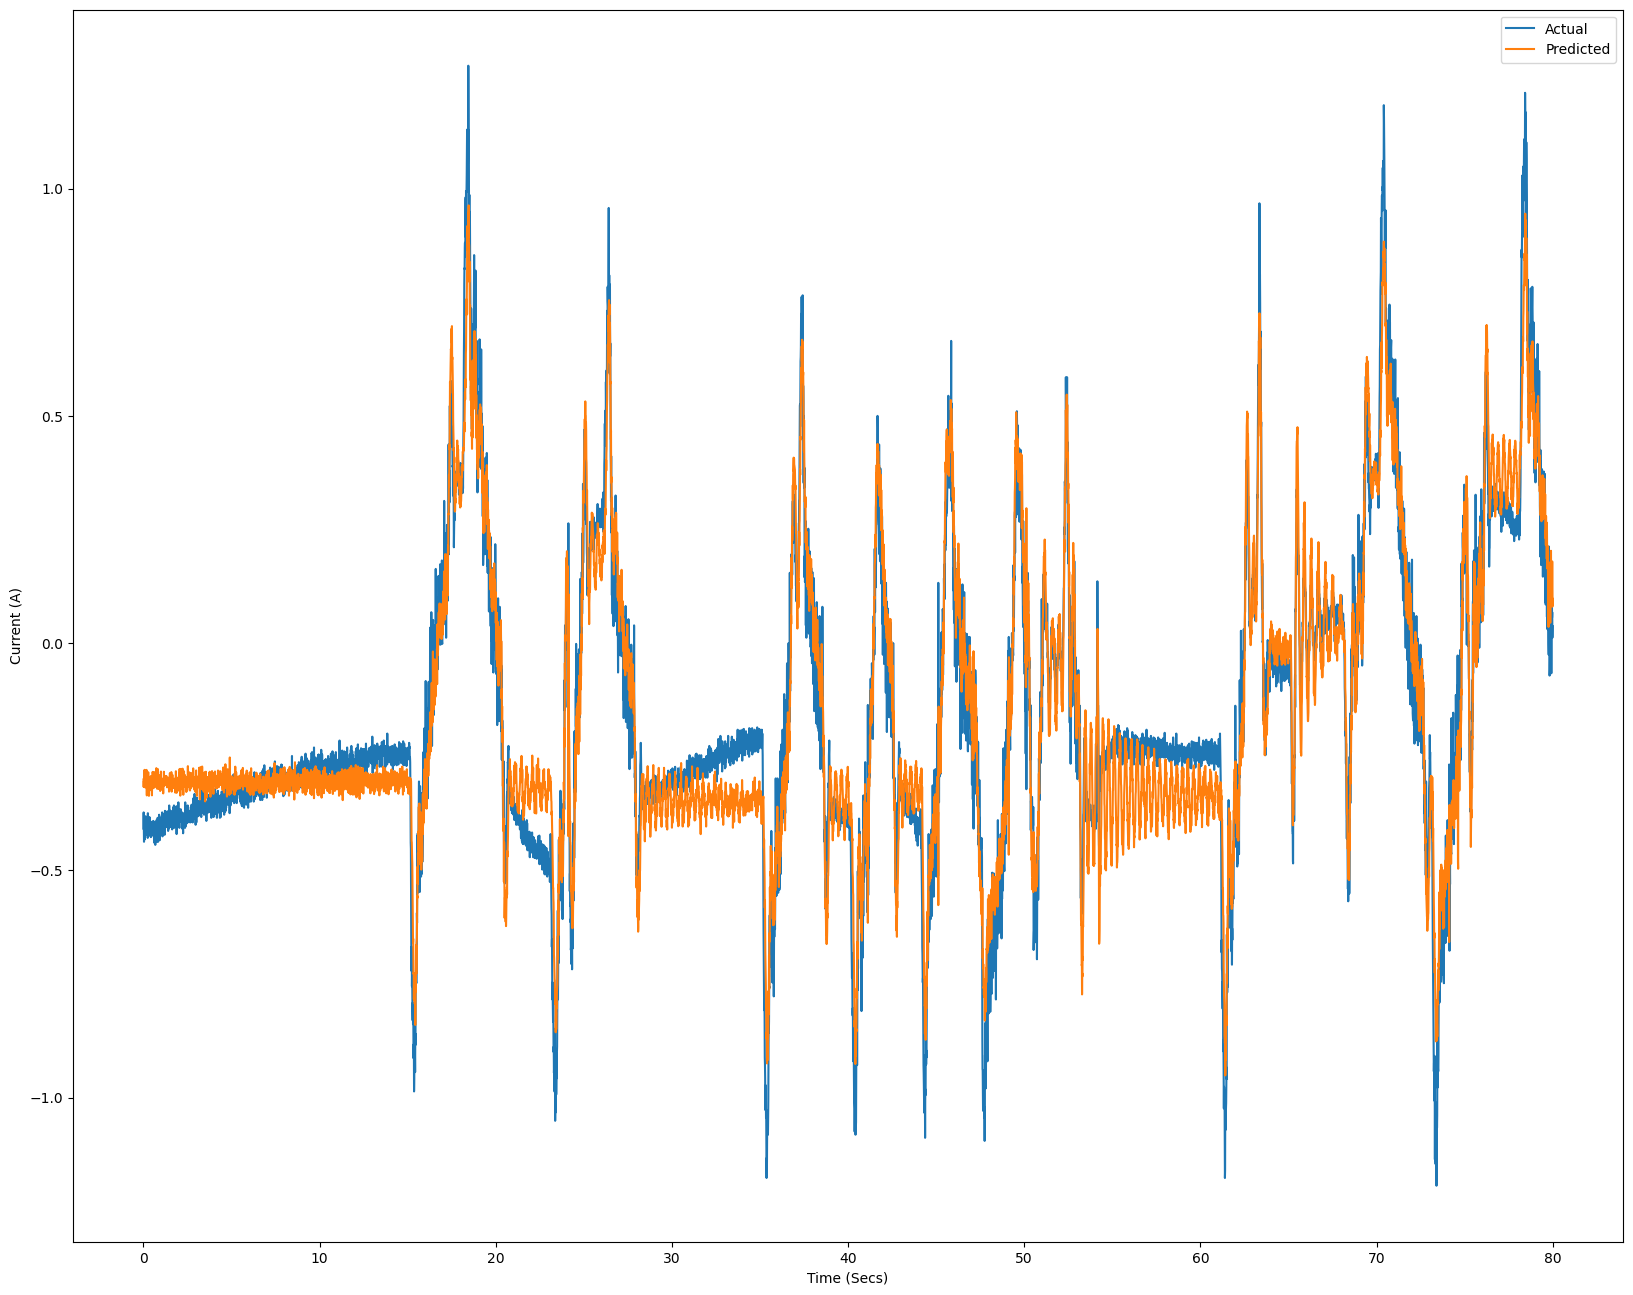

In [77]:
# TODO
ytrain_pred = regr.predict(Xtrain)
plt.figure(figsize=(20,16))
plt.plot(t, ytrain, label='Actual')
plt.plot(t, ytrain_pred, label='Predicted')
plt.xlabel('Time (Secs)')
plt.ylabel('Current (A)')
plt.legend()
plt.show()

Measure the normalized RSS given by `RSS / (n s^2_y).

In [78]:
# TODO
Sy=np.std(ytrain)
RSS_train = np.mean((ytrain-ytrain_pred)**2)/(Sy**2)
print(f"Normalized RSS of trained data: {RSS_train:.5f}")

Normalized RSS of trained data: 0.09583


## Measure the Fit on an Indepdent Dataset

Up to now, we have only tested the model on the same data on which it was trained.  In general, we need to test model on independent data not used in the training.  For this purpose, load the data in `exp2.csv`.  Compute the regression predicted values on this data and plot the predicted and actual values over time.

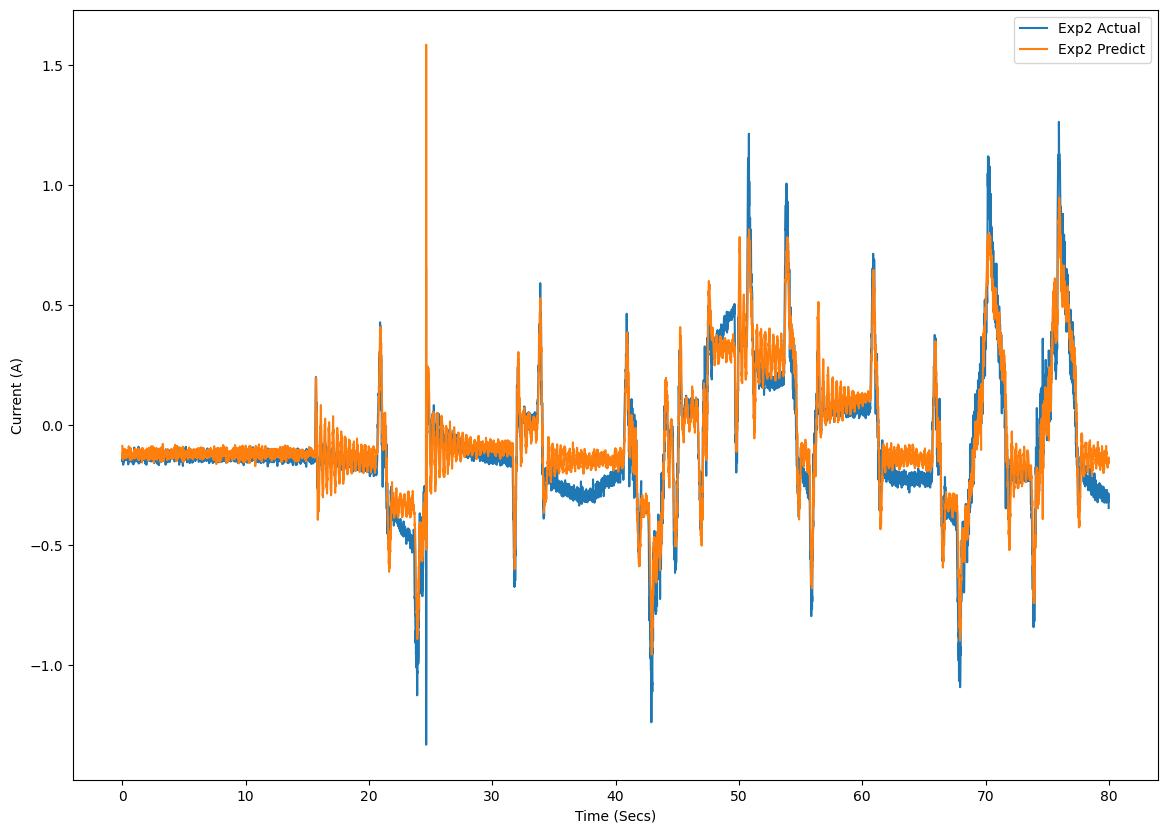

In [79]:
# TODO
df2 = pd.read_csv("exp2.csv", header=None, names=names) 
y2Actual = df2[names[8]]
XTest =df2[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
y2Predict= regr.predict(XTest)
plt.figure(figsize=(14,10))
plt.plot(t, y2Actual, label='Exp2 Actual')
plt.plot(t, y2Predict, label='Exp2 Predict')
plt.xlabel('Time (Secs)')
plt.ylabel('Current (A)')
plt.legend()
plt.show()

Measure the normalized RSS on the test data.

In [80]:
# TODO
Sy=np.std(y2Actual)
RSS_test = np.mean((y2Actual-y2Predict)**2)/(Sy**2)
print(f"Normalized RSS of trained data: {RSS_test:.5f}")

Normalized RSS of trained data: 0.12678
